In [2]:
#on importe les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import gensim

In [4]:
#on charge notre dataset
df = pd.read_csv("data/reviews_en.csv")

#on crée un corpus avec les textes du dataset reviews_en.csv
corpus = df.texts

#on affiche les premières lignes du corpus
corpus.head()

0    As much as I wanted to love the box it came br...
1    The app opens and immediately crashes. Can't w...
2    I needed this for a project. The scroll came w...
3    Terrible fit in bust area; not flattering at a...
4    The filter works GREAT.... once I fixed it!!!!...
Name: texts, dtype: object

In [5]:
#on charge le modèle de langue anglaise de spacy en mode moyen (md) pour tokeniser le corpus
nlp = spacy.load("en_core_web_md")

In [3]:
#on tire 10 échantillons aléatoires du DataFrame
#cela nous permet d'explorer nos données rapidement.
corpus.sample(n=10)

6288                         died in less than 90 days !!
9233    Dislike :( It leaks and I do not know where. I...
3217    I have tried to like this oil, but to me it ha...
8541    product has a freshness date of February 21, 2...
3274    The blower is ok, but the weed eater is terrib...
2276    Everyone was right. Garbage. Only Way of the d...
1107    After eagerly anticipating to watch this child...
9286    i ordered several, they don't work, this machi...
6087                           Worked once, sent it back.
5308    I ordered these Aug. 26. Today is Oct. 10 and ...
Name: texts, dtype: object

In [6]:
# la méthode sample() permet de retourner un nombre n aléatoire d'éléments
# la méthode pipe() de spaCy est adaptée au traitement de textes en séries. Attention, elle retourne un générateur ! 
docs = nlp.pipe(corpus.sample(n=10000))
train = [] # creer nouvelle liste qui servir de corpus tokenizé
for doc in docs:
    filtered_doc = [] # doc tokenizé
    for token in doc:
        if token.is_stop:
            pass
        elif token.is_punct:
            pass
        else:
            filtered_doc.append(token.lemma_) # si token est bon, on l'ajoute a la liste
            
    train.append(filtered_doc) # on ajoute le doc tokenizé au nouveau corpus
len(train)

10000

In [7]:
from gensim.models import Word2Vec # on importe la classe Word2Vec

vector_size = 100  # taille du vecteur

window = 5  # fenêtre de mots à considérer

min_count = 1  # fréquence minimale des mots


# instancier le modèle déclence son entraînement
model = Word2Vec(sentences = train, vector_size=vector_size, window=window, min_count=min_count)

In [8]:
# l'attribut wv d'un modèle est un dictionnaire, où les clés sont des mots et les valeurs des vecteurs
model.wv["sent"]

array([-0.06217378,  0.20061393,  0.02878015,  0.00392949,  0.07482631,
       -0.29081047,  0.15929127,  0.34415758, -0.10826652, -0.05546524,
       -0.05911543, -0.24992009, -0.0889046 ,  0.11245325,  0.03498001,
       -0.07603101,  0.03398263, -0.16704659, -0.02881601, -0.3932526 ,
        0.11323075,  0.11367   ,  0.10530341, -0.07018738, -0.12107608,
       -0.06224459, -0.0474672 , -0.1976712 , -0.17099634,  0.04194965,
        0.1862391 ,  0.10159712,  0.04330587, -0.13121201, -0.11789812,
        0.21253367,  0.02109125, -0.19144124, -0.1298446 , -0.3425596 ,
        0.10416064, -0.2092237 , -0.03027888,  0.04265218,  0.16506344,
        0.00319094, -0.13651115, -0.06227637,  0.05248986,  0.07461921,
        0.04895439, -0.12628824, -0.02949686,  0.02443668, -0.16122894,
        0.14941253,  0.0405831 ,  0.00952885, -0.17088635,  0.0911621 ,
        0.13073787,  0.0746975 , -0.04653784, -0.04604212, -0.24447666,
        0.15613097,  0.08882753,  0.16120265, -0.24366367,  0.18

***Calculer la similarité entre deux mots***

In [9]:
model.wv.similarity("find", "receive")

0.9554968

In [11]:
model.wv.similarity("product", "bought")

0.96726656


***Identifer les mots les plus similaires à un mot donné***


In [12]:
# identifie le mot le plus similaires de la liste par rapport
# a un autre mot
word_list = ["product", "find", "bought"]
model.wv.most_similar_to_given("receive", word_list)

'product'

***Calculer la similarité entre deux vecteurs***

In [13]:
# on obtient/récuperer des vecteurs
company = model.wv["company"]
work = model.wv["work"]
money = model.wv["money"]

print("sim_company_and_work:", model.wv.cosine_similarities(company, [work]))
print("sim_company_money:", model.wv.cosine_similarities(company, [money]))
print("sim_money_work:", model.wv.cosine_similarities(money, [work]))

print("sim_work_money_comppany:", model.wv.cosine_similarities(work, [money, company]))

sim_company_and_work: [0.8557043]
sim_company_money: [0.8201554]
sim_money_work: [0.7864837]
sim_work_money_comppany: [0.78648365 0.85570437]


*** Représenter les 50 premiers mots des Word Embeddings sous forme de graphique***

In [15]:
from gensim.models import word2vec, keyedvectors
from sklearn.decomposition import PCA

In [16]:
#on appel le model comme vu que nous ne l'avons pas encore enrigistré sur disque
model = Word2Vec(sentences = train, vector_size=vector_size, window=window, min_count=min_count)

# Les 50 premiers mots du vocabulaire
mots_vocab = model.wv.index_to_key[:50] 
mots_vocab

# Les vecteurs correspondants à nos 50 mosts de notre vocabulaire
vec_mots = np.array([model.wv[word] for word in mots_vocab]) 
vec_mots

array([[ 0.09345498,  1.0593525 , -0.08051329, ..., -0.54308313,
         0.01881619, -0.40317416],
       [-0.0916457 ,  0.6490075 , -0.12839483, ..., -0.45735267,
         0.13931313, -0.12905166],
       [ 0.03091308,  0.8096562 , -0.09742675, ..., -0.43642625,
         0.23955762, -0.20090184],
       ...,
       [ 0.001734  ,  0.7459815 , -0.08984403, ..., -0.4206705 ,
         0.22730616, -0.20095846],
       [-0.0165734 ,  0.9246674 , -0.09221426, ..., -0.43227586,
         0.1208207 , -0.2947175 ],
       [-0.07619262,  0.72264874, -0.16783756, ..., -0.49541888,
         0.04082751, -0.23106101]], dtype=float32)

In [ ]:
#on utilise pca pour réduire la dimension de nos vocabulaire pour pouvoir les vizualizer dans un graphique
pca= PCA(n_components=2)
# on applique la méthode fit_transform pour réduire la dimension de nos vecteurs
vecs_reduits= pca.fit_transform(vec_mots)
vecs_reduits

array([[-2.221128  , -0.9712258 ],
       [ 0.69012374,  0.1552027 ],
       [-0.3636427 ,  0.3441337 ],
       [ 1.1077173 , -0.1196951 ],
       [ 1.4129223 , -0.73687893],
       [ 0.36955512,  1.1748065 ],
       [-0.66172534,  0.32662806],
       [ 1.6015247 , -0.8604842 ],
       [-1.2747372 , -0.1477438 ],
       [-0.7547195 ,  1.6102716 ],
       [ 0.205418  , -0.00917779],
       [-0.32468945,  0.25710177],
       [ 0.43492082,  1.1557869 ],
       [-0.20859185, -0.10368047],
       [-0.9813883 , -1.1741409 ],
       [-0.7678834 , -0.09757711],
       [ 1.8937773 , -0.7412745 ],
       [-1.9179641 , -1.2550012 ],
       [ 1.5978855 , -0.5969215 ],
       [-0.10667443,  0.76605606],
       [-1.4410163 , -1.3269991 ],
       [ 0.07320354, -0.05540959],
       [ 1.1124374 ,  0.2953122 ],
       [-0.9256701 ,  1.9392508 ],
       [ 0.08362968,  0.14729807],
       [-0.09597731,  0.7021361 ],
       [-0.274932  ,  0.11728819],
       [ 1.6525517 , -0.6354936 ],
       [-0.3184135 ,

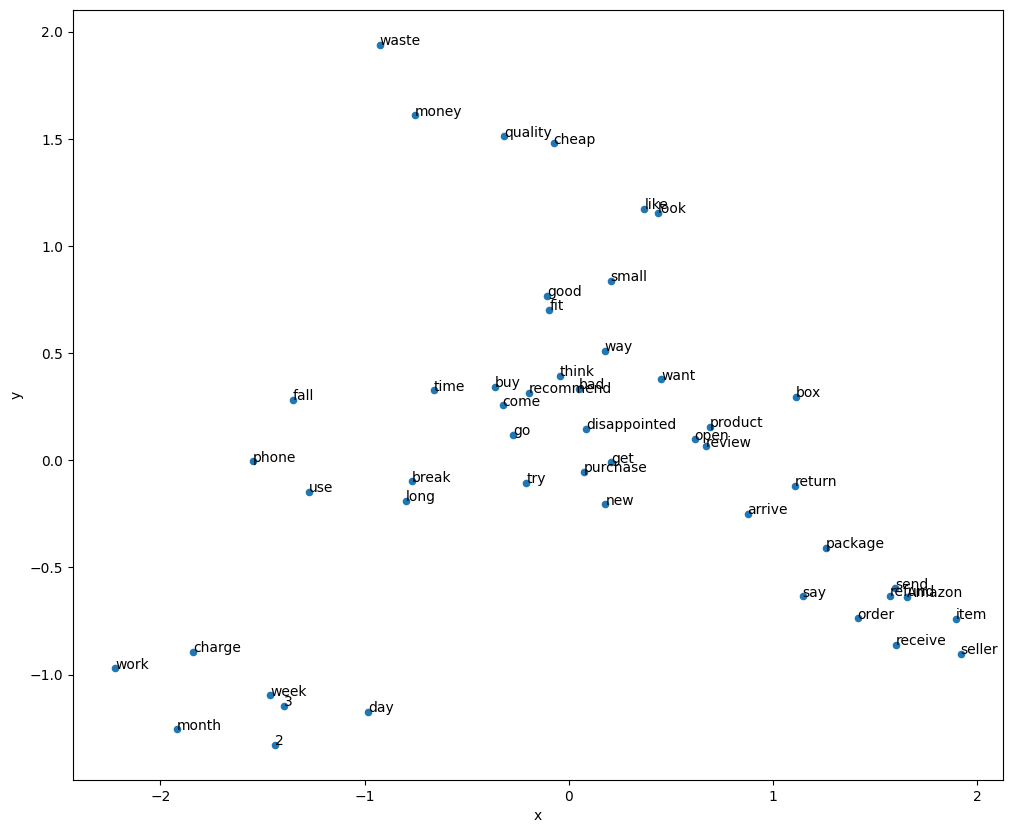

In [18]:
#on vizualize les vecs_reduits dans graphique

#on utilise la liiste des mots du vocabulaire du modèle comme index pour la DataFrame.
df = pd.DataFrame(vecs_reduits, columns=['x', 'y'], index= mots_vocab)

# Initialisation de la figure
fig, ax = plt.subplots(figsize= (12, 10))

# Tracé des points pour les 50 mots
df.plot('x', 'y', kind='scatter', ax=ax)

# Annoter chaque point avec son mot
for word, coord in df.iterrows():
    ax.annotate(word, (coord['x'], coord['y']))


**on sauvegarde le model**

In [21]:
model.save("data/reviews_en_model.w2v")
print(model)

Word2Vec<vocab=10795, vector_size=100, alpha=0.025>
